# Importing necessary libraries

In [ ]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# To display multiple dataframes from one cell
from IPython.display import display

# To perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# To build a logistic regression model
from sklearn.linear_model import LinearRegression

#To build exponential smoothening models
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# To visualize ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# To build ARIMA model
from statsmodels.tsa.arima.model import ARIMA

#  To perform date arithmetic, allowing easy calculations and manipulations
from dateutil.relativedelta import relativedelta


# To evaluate the performance of the model
from sklearn.metrics import mean_squared_error

from sklearn import metrics
# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/gold_prices.csv') #Complete the code to read the data and parse_dates to automatically infer datetime format for a datetime attribute

# Data Overview

In [ ]:
df.head() #Complete the code to view first 5 rows of the data

,Date,Price
0,08/17/2023,1915.2
1,08/16/2023,1928.3
2,08/15/2023,1935.2
3,08/14/2023,1944.0
4,08/11/2023,NaN


In [ ]:
df.tail() #Complete the code to view last 5 rows of the data

,Date,Price
2534,08/23/2013,NaN
2535,08/22/2013,1370.8
2536,08/21/2013,1370.1
2537,08/20/2013,1372.6
2538,08/19/2013,1365.7


In [ ]:
df.shape  #Complete the code to find the shape of the data

(2539, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2539 entries, 0 to 2538
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2539 non-null   object 
 1   Price   2460 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.8+ KB


In [ ]:
df.describe() #Complete the code to find the statistics of the data

,Price
count,2460.000000
mean,1468.784350
std,282.977384
min,1049.600000
25%,1244.375000
50%,1322.150000
75%,1775.025000
max,2069.400000


In [ ]:
df.isnull().sum() #Check for null values

,0
Date,0
Price,79


### Missing value treatment

In [ ]:
df['Price'] = df['Price'].fillna(df['Price'].mean())  #Fill the missing values with an appropriate technique

In [ ]:
df.isnull().sum()

,0
Date,0
Price,0


In [ ]:
df.set_index('Date',inplace=True) #Complete the code to set the date column as index

In [ ]:
df.index = pd.to_datetime(df.index)

# Exploratory Data Analysis

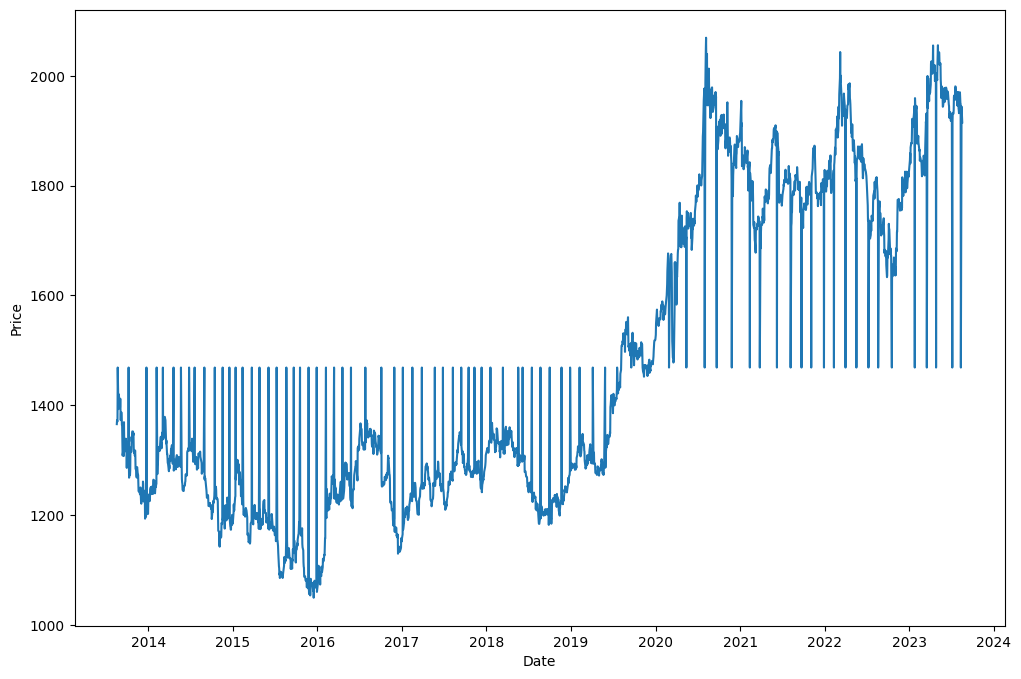

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x=df.index, y='Price') # Complete the code to find the trend of the data
plt.show()

In [ ]:
#We will resample the data to get values at a month-level from the day-level data by taking the average over the months.

df = df.resample('M').mean()
df.head()

,Price
Date,
2013-08-31,1398.908435
2013-09-30,1348.461905
2013-10-31,1324.064537
2013-11-30,1273.433333
2013-12-31,1235.049289


In [ ]:
df.shape
#Find the shape of the data after resampling

(121, 1)

In [ ]:
df.describe() #Complete the code to find the statistics of the data

,Price
count,121.000000
mean,1472.077843
std,274.950834
min,1086.686276
25%,1254.056398
50%,1330.680952
75%,1765.860189
max,1997.940909


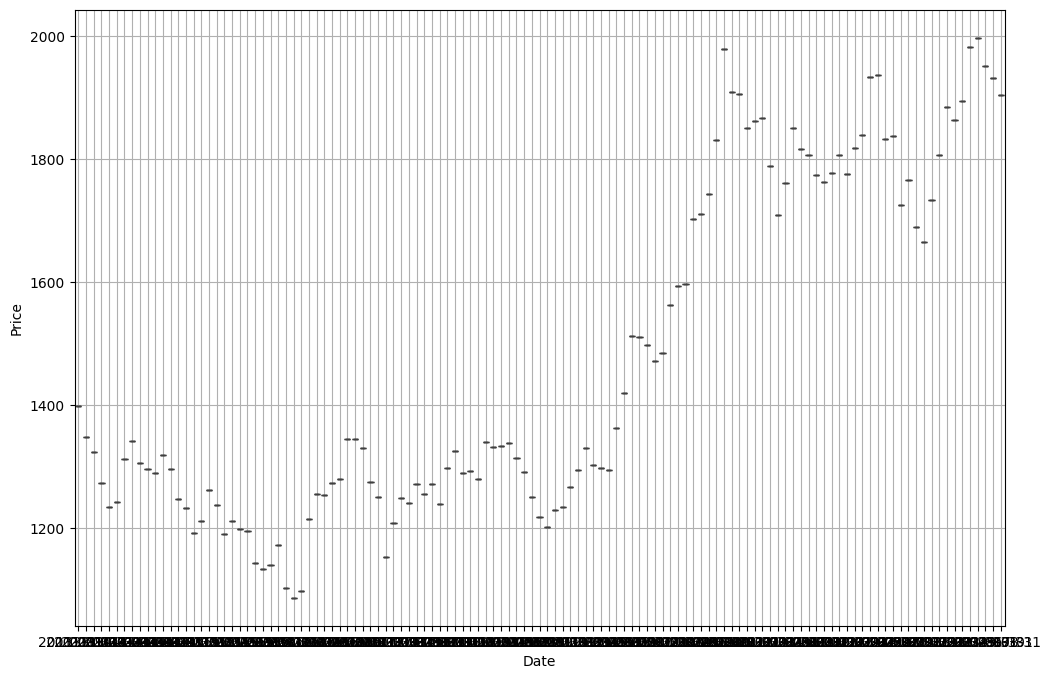

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Date',y = 'Price',data=df) # Complete the code to plot a boxplot at year level
plt.grid();

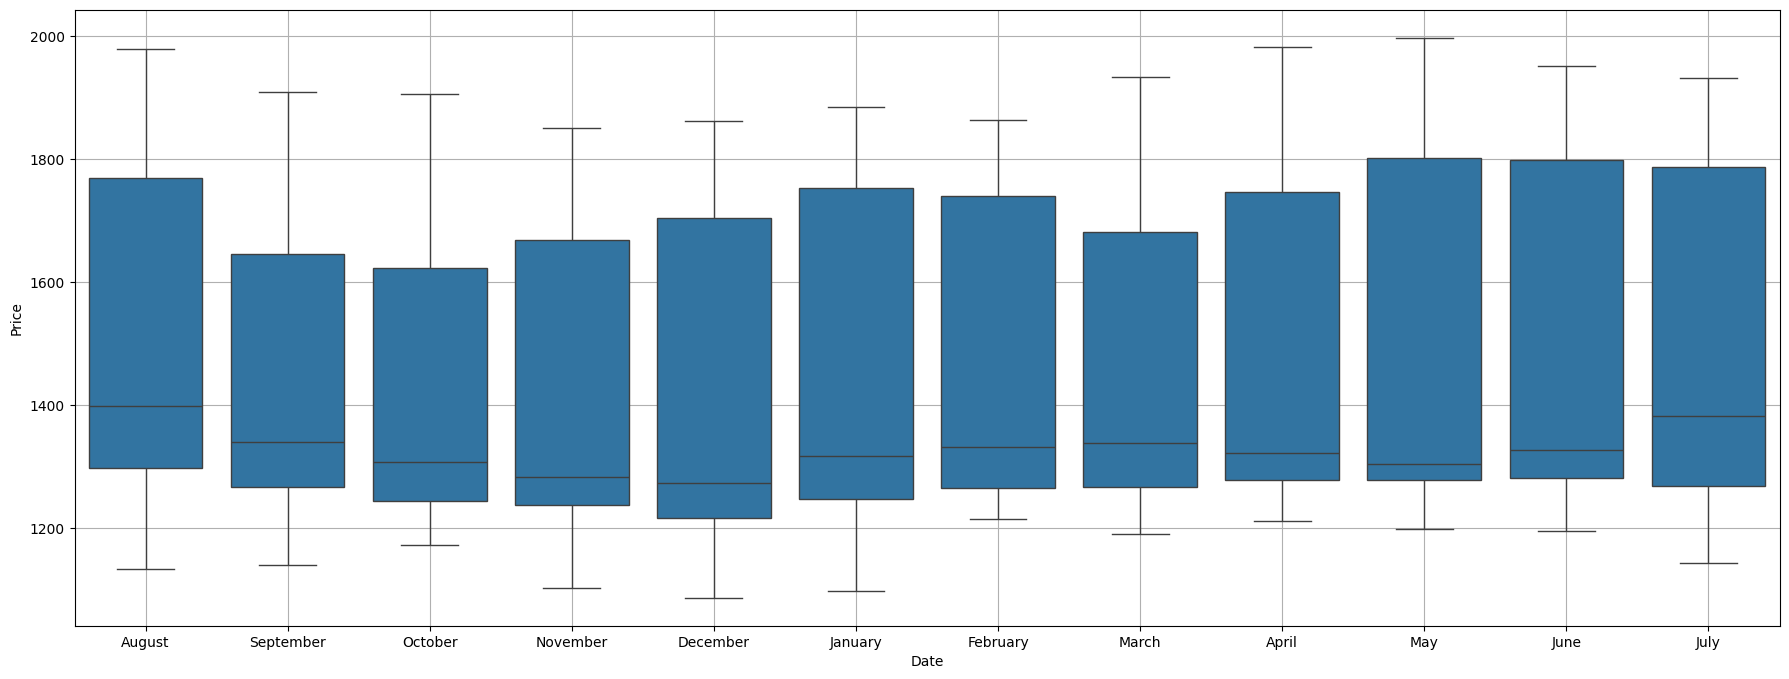

In [ ]:
_,ax= plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(),y='Price',data=df,ax=ax)
plt.grid();

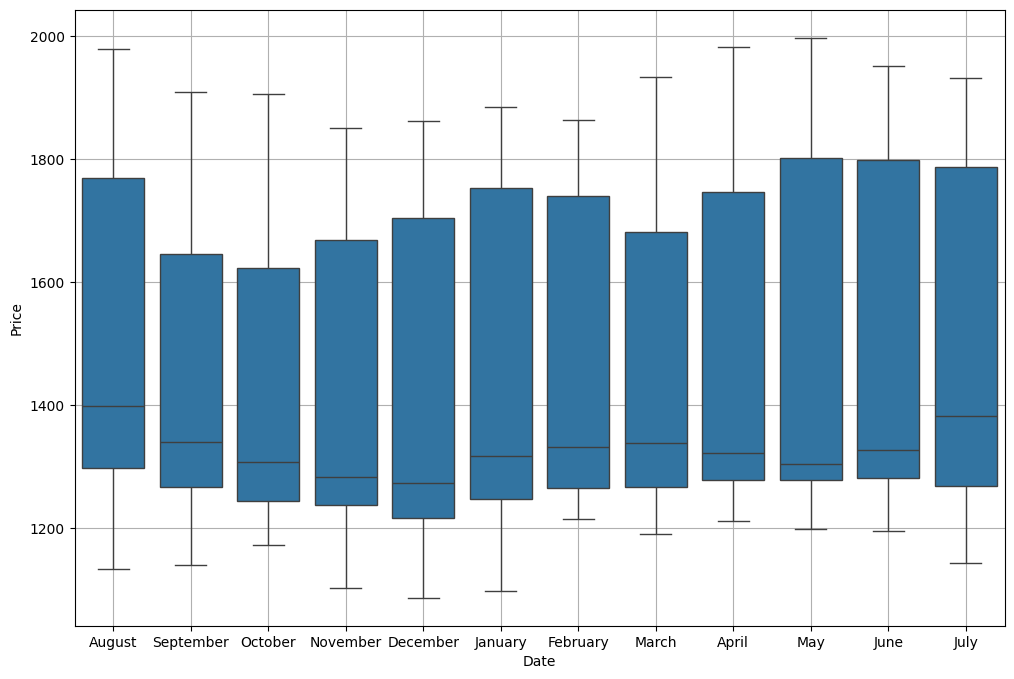

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))
sns.boxplot(x = df.index.month_name(),y = 'Price',data=df) # Complete the code to plot a boxplot at month level
plt.grid();

In [ ]:
#Complete the code to create a pivot table to display monthly price across years
monthly_price_across_years = pd.pivot_table(df, values = 'Price', columns = df.index.month_name(), index = df.index.year)
monthly_price_across_years

Date,April,August,December,February,January,July,June,March,May,November,October,September
Date,,,,,,,,,,,,
2013,NaN,1398.908435,1235.049289,NaN,NaN,NaN,NaN,NaN,NaN,1273.433333,1324.064537,1348.461905
2014,1306.722016,1296.680952,1211.151493,1311.909217,1242.034783,1318.708015,1289.651636,1342.099255,1296.035652,1191.374217,1233.464537,1247.035652
2015,1211.949289,1133.542112,1086.686276,1237.649217,1261.790198,1143.381928,1194.826561,1190.208380,1198.476190,1102.213540,1172.844743,1139.390198
2016,1254.056398,1344.482609,1153.690476,1215.149217,1097.289474,1344.494217,1279.190909,1256.022016,1272.646874,1249.937350,1275.527826,1330.680952
2017,1271.136842,1298.121059,1280.014217,1248.641282,1209.089217,1238.990000,1272.422016,1241.055841,1255.344743,1292.513540,1290.017470,1325.519217
2018,1338.661905,1217.851493,1266.209217,1332.594737,1340.518302,1251.389731,1291.846874,1333.737350,1313.590198,1234.037350,1229.434102,1201.994737
2019,1297.146874,1511.818182,1484.347619,1330.272861,1294.500000,1420.322016,1363.440000,1301.871429,1294.403834,1471.104217,1497.634783,1511.449217
2020,1703.266667,1980.271429,1862.845455,1593.441282,1562.585714,1831.667470,1743.809091,1596.859091,1710.889217,1851.149217,1905.550000,1908.923064
2021,1760.909524,1774.994743,1776.981107,1788.609703,1867.557895,1807.623810,1816.403834,1709.221059,1851.620000,1807.032588,1777.428571,1763.399255


<Figure size 1500x800 with 0 Axes>

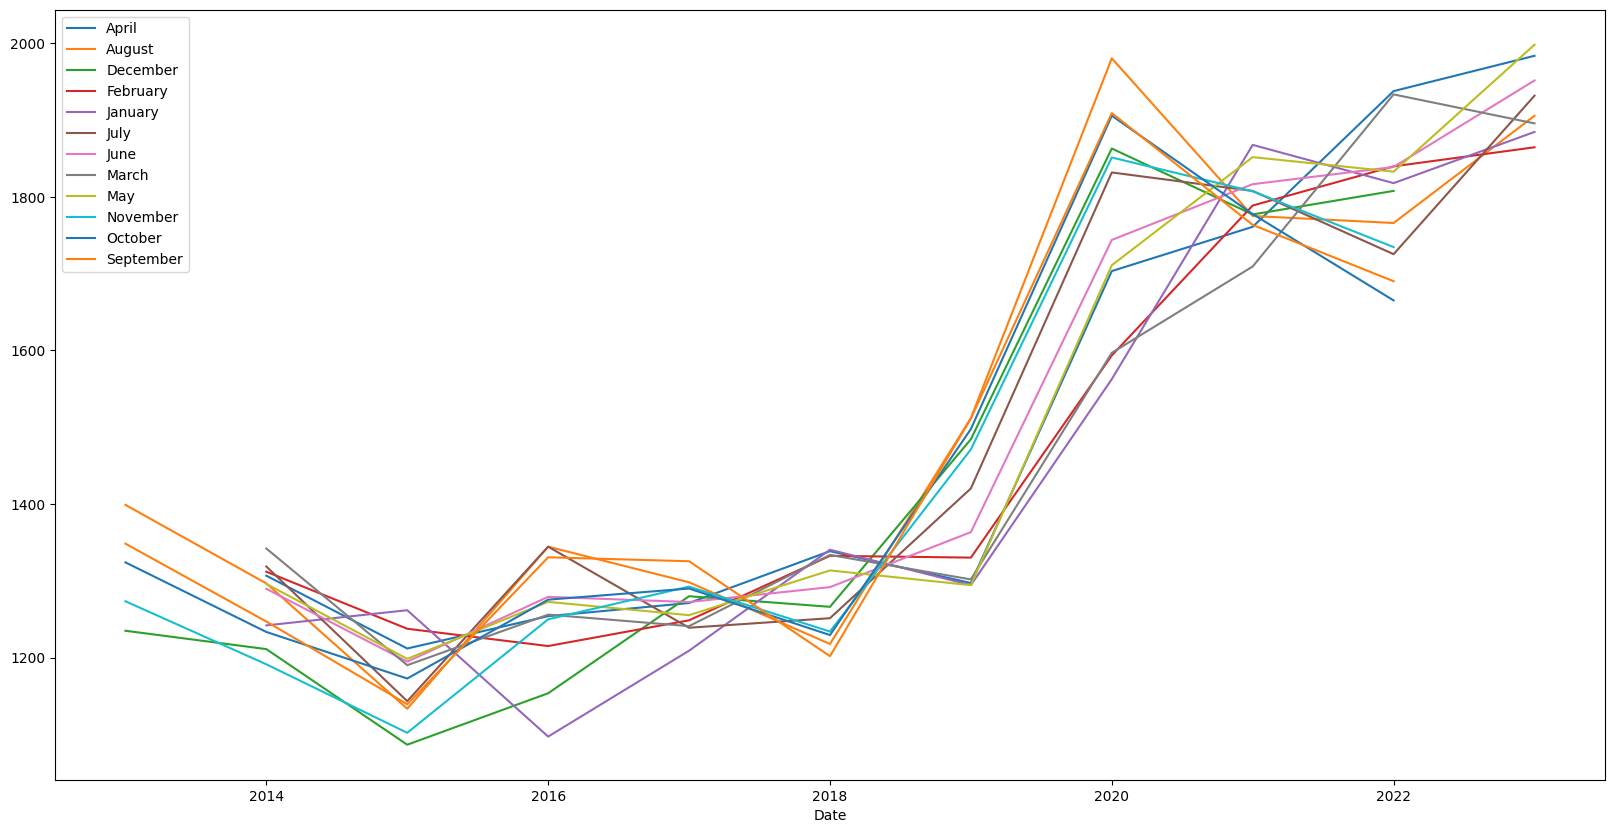

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 8))
monthly_price_across_years.plot(figsize=(20,10))  #Complete the code to plot trend of months across years
plt.legend(loc='best')
plt.show()

### Decomposition

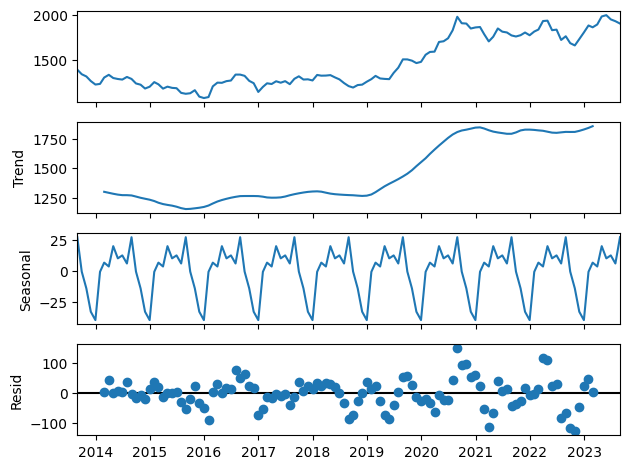

In [ ]:
#Decompose the time series additively
df_add_decompose = seasonal_decompose(df, model = 'addictively')  # Complete the code to decompose
df_add_decompose.plot() # Complete the code to plot
plt.show()

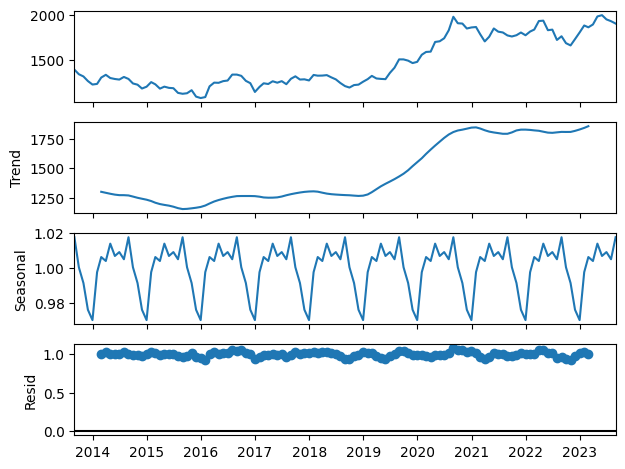

In [ ]:
#Decompose the time series multiplicative
df_mul_decompose = seasonal_decompose(df,model='multiplicative') #Complete the code to decompose multiplicatively
df_mul_decompose.plot()   #Complte the code to plot
plt.show()

# Data Pre-processing

### Split the data into train and test and plot the training and test data.

In [ ]:
#Complete the code to split train set consisting data until 2020 and test set from 2021 onwards
train = df[df.index.year < 2021]
test = df[df.index.year >= 2021]

In [ ]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Price
Date,
2013-08-31,1398.908435
2013-09-30,1348.461905
2013-10-31,1324.064537
2013-11-30,1273.433333
2013-12-31,1235.049289


Last few rows of Training Data


,Price
Date,
2020-08-31,1980.271429
2020-09-30,1908.923064
2020-10-31,1905.550000
2020-11-30,1851.149217
2020-12-31,1862.845455


First few rows of Test Data


,Price
Date,
2021-01-31,1867.557895
2021-02-28,1788.609703
2021-03-31,1709.221059
2021-04-30,1760.909524
2021-05-31,1851.620000


Last few rows of Test Data


,Price
Date,
2023-04-30,1983.525492
2023-05-31,1997.940909
2023-06-30,1951.438095
2023-07-31,1931.594217
2023-08-31,1905.429565


In [ ]:
#Complete the code to check the shape of train and test sets
print(train.shape)
print(test.shape)

(89, 1)
(32, 1)


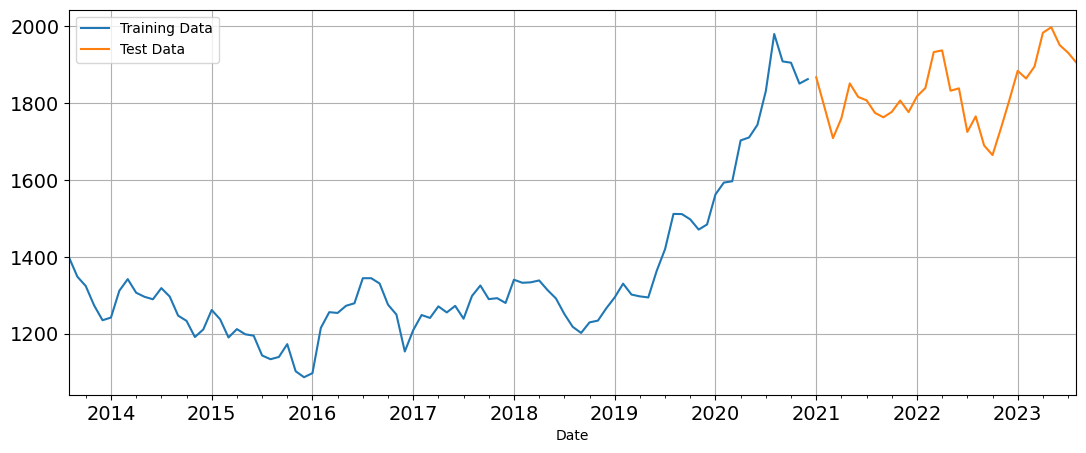

In [ ]:
train['Price'].plot(figsize=(13,5), fontsize=14) #Complete the code to find the trend of train data
test['Price'].plot(figsize=(13,5), fontsize=14)   #Complete the code to find the trend of test data
  #Complete the code to find the trend of test data
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Model Building - Original Data

### Linear Regression

In [ ]:
#Complete the code to generate the numerical time instance order for both the training and test set.
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train) for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
Test Time instance 
 [89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]


In [ ]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [ ]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
                   Price  time
Date                         
2013-08-31  1398.908435     1
2013-09-30  1348.461905     2
2013-10-31  1324.064537     3
2013-11-30  1273.433333     4
2013-12-31  1235.049289     5 

Last few rows of Training Data 
                   Price  time
Date                         
2020-08-31  1980.271429    85
2020-09-30  1908.923064    86
2020-10-31  1905.550000    87
2020-11-30  1851.149217    88
2020-12-31  1862.845455    89 

First few rows of Test Data 
                   Price  time
Date                         
2021-01-31  1867.557895    89
2021-02-28  1788.609703    90
2021-03-31  1709.221059    91
2021-04-30  1760.909524    92
2021-05-31  1851.620000    93 

Last few rows of Test Data 
                   Price  time
Date                         
2023-04-30  1983.525492   116
2023-05-31  1997.940909   117
2023-06-30  1951.438095   118
2023-07-31  1931.594217   119
2023-08-31  1905.429565   120 



* Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛
  to build the model on the training data and test the model on the test data.*

In [ ]:
lr = LinearRegression() #Complete the code to define the linear regression model

In [ ]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train[['Price']].values)  #__________________Complete the code to build the linear regression model

LinearRegression()

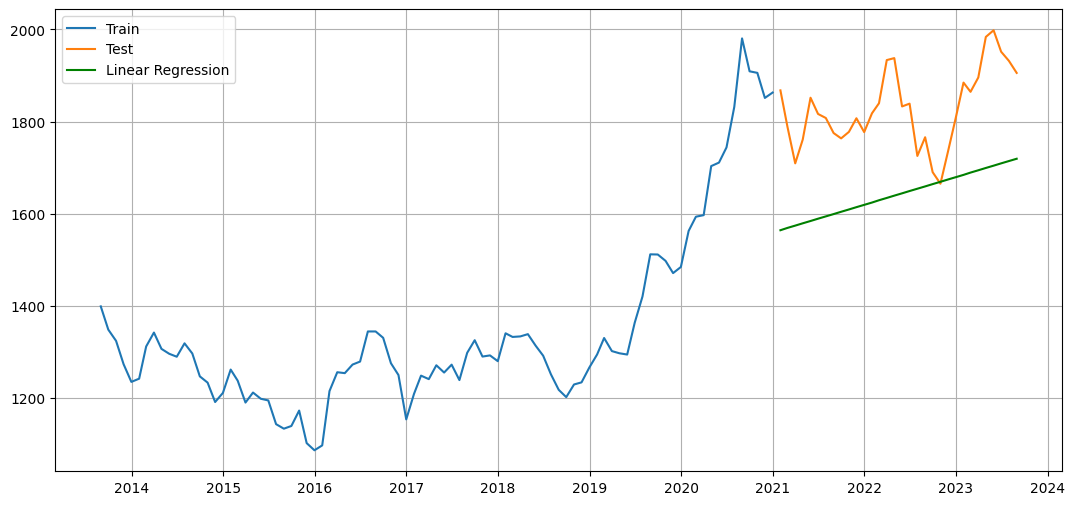

In [ ]:
test_predictions_model1 = lr.predict( LinearRegression_test[['time']] )  #Complete the code to make predictions
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot( LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green') # Complete the code to plot the predictions made by the model
plt.legend(loc='best')
plt.grid();

In [ ]:
## Test Data - RMSE

rmse_model1_test =metrics.mean_squared_error(test['Price'],test_predictions_model1,squared=False) # Complete the code to find the RMSE on test data
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 201.18


In [ ]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

,Test RMSE
Linear Regression,201.175903


### Moving Average (MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
For Moving Average, we are going to average over the entire data.

In [ ]:
MovingAverage = df.copy()
MovingAverage.head()

,Price
Date,
2013-08-31,1398.908435
2013-09-30,1348.461905
2013-10-31,1324.064537
2013-11-30,1273.433333
2013-12-31,1235.049289


In [ ]:
#Trailing Moving Average

MovingAverage['Trailing_2'] = MovingAverage['Price'].rolling(2).mean() #Complete the code to find 2 point trailing average
MovingAverage['Trailing_4'] = MovingAverage['Price'].rolling(4).mean() #Complete the code to find 4 point trailing average
MovingAverage['Trailing_6'] = MovingAverage['Price'].rolling(6).mean() #Complete the code to find 6 point trailing average
MovingAverage['Trailing_9'] = MovingAverage['Price'].rolling(9).mean() #Complete the code to find 9 point trailing average

MovingAverage.head()

,Price,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Date,,,,,
2013-08-31,1398.908435,NaN,NaN,NaN,NaN
2013-09-30,1348.461905,1373.685170,NaN,NaN,NaN
2013-10-31,1324.064537,1336.263221,NaN,NaN,NaN
2013-11-30,1273.433333,1298.748935,1336.217052,NaN,NaN
2013-12-31,1235.049289,1254.241311,1295.252266,NaN,NaN


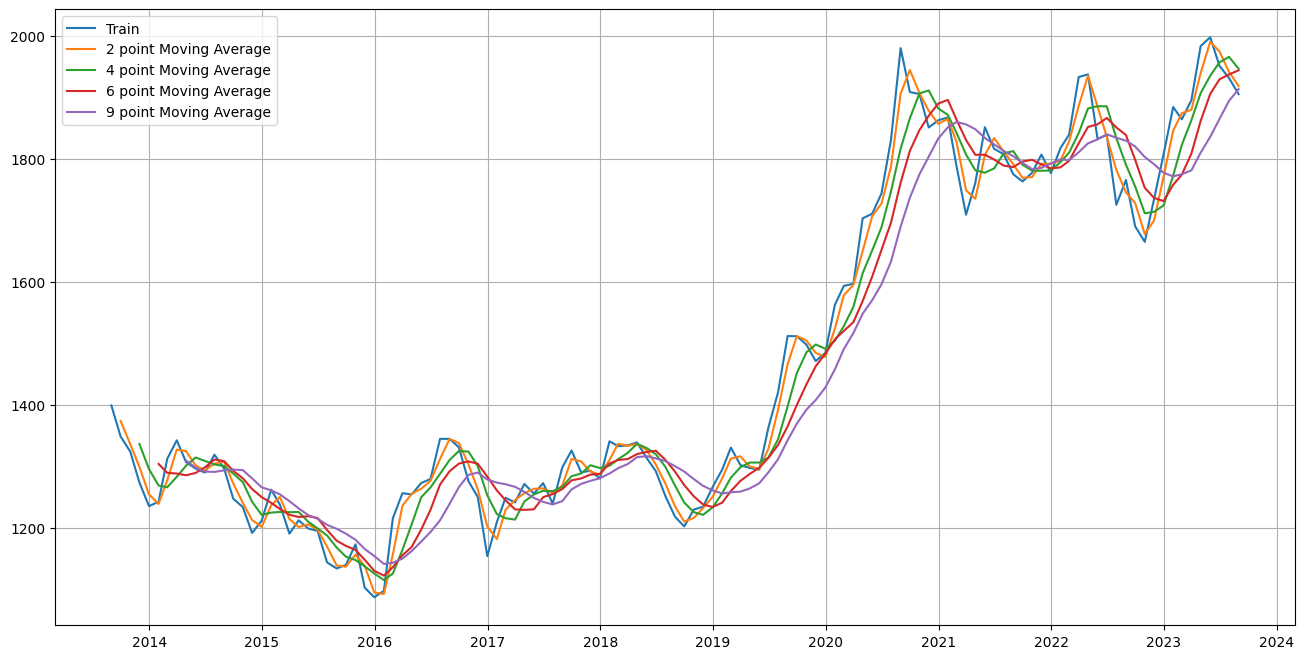

In [ ]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Price'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label= '2 point Moving Average') #Complete the code to plot the 2 point moving average
plt.plot(MovingAverage['Trailing_4'], label= '4 point Moving Average') #Complete the code to plot the 4 point moving average
plt.plot(MovingAverage['Trailing_6'], label= '6 point Moving Average') #Complete the code to plot the 6 point moving average
plt.plot(MovingAverage['Trailing_9'], label= '9 point Moving Average') #Complete the code to plot the 9 point moving average

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [ ]:
#Creating train and test set
trailing_MovingAverage_train= MovingAverage[MovingAverage.index.year < 2021]
trailing_MovingAverage_test= MovingAverage[MovingAverage.index.year >= 2021]


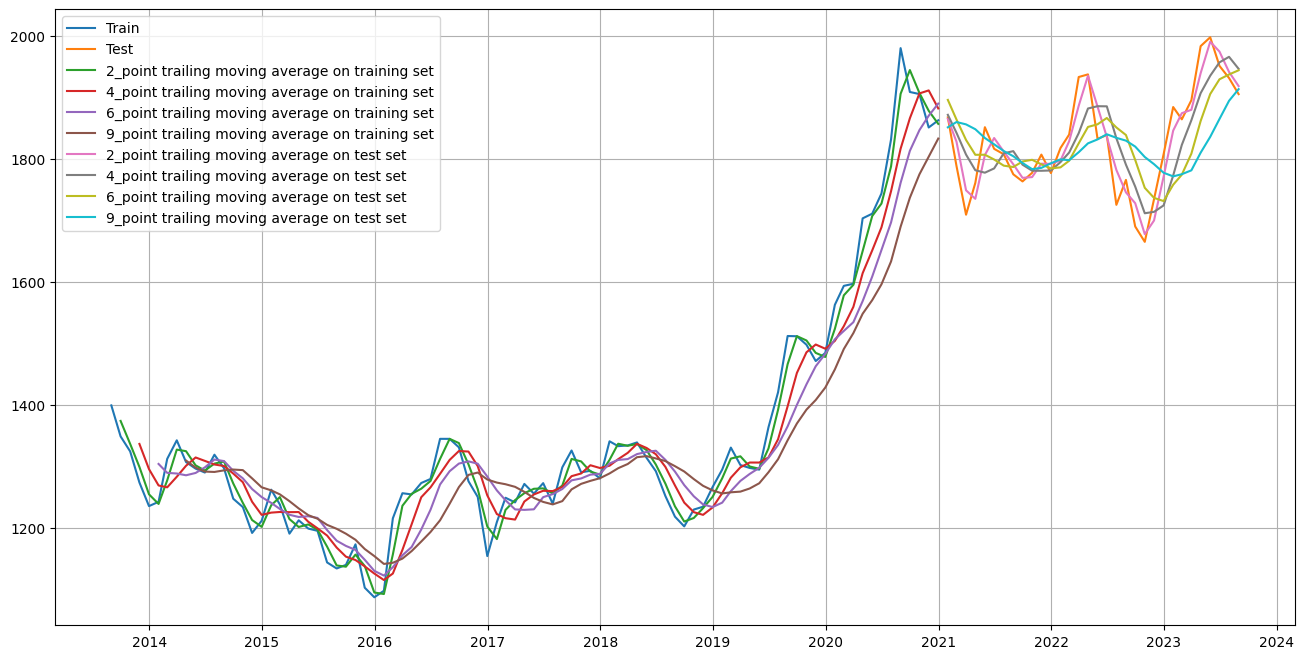

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Price'], label='Train')
plt.plot(trailing_MovingAverage_test['Price'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'],label='2_point trailing moving average on training set')
plt.plot(trailing_MovingAverage_train['Trailing_4'],label='4_point trailing moving average on training set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label='6_point trailing moving average on training set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label='9_point trailing moving average on training set')

plt.plot(trailing_MovingAverage_test['Trailing_2'],label='2_point trailing moving average on test set')
plt.plot(trailing_MovingAverage_test['Trailing_4'],label='4_point trailing moving average on test set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label='6_point trailing moving average on test set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label='9_point trailing moving average on test set')

plt.legend(loc='best')
plt.grid();

In [ ]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Price'],trailing_MovingAverage_test['Trailing_2'],squared=False) #Complete the code to find the RMSE for 2 point moving average
print('for 2 point Moving Average Model forecast on the Training Data, RMSE is %3.3f' %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Price'],trailing_MovingAverage_test['Trailing_4'],squared=False) #Complete the code to find the RMSE for 4 point moving average
print('for 4 point Moving Average Model forecast on the Training Data, RMSE is %3.3f' %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 =  metrics.mean_squared_error(test['Price'],trailing_MovingAverage_test['Trailing_6'],squared=False)   #Complete the code to find the RMSE for 6 point moving average
print('for 6 point Moving Average Model forecast on the Training Data, RMSE is %3.3f' %(rmse_model4_test_6))
## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 =  metrics.mean_squared_error(test['Price'],trailing_MovingAverage_test['Trailing_9'],squared=False)  #Complete the code to find the RMSE for 9 point moving average
print('for 9 point Moving Average Model forecast on the Training Data, RMSE is %3.3f' %(rmse_model4_test_9))

for 2 point Moving Average Model forecast on the Training Data, RMSE is 27.872
for 4 point Moving Average Model forecast on the Training Data, RMSE is 54.239
for 6 point Moving Average Model forecast on the Training Data, RMSE is 69.513
for 9 point Moving Average Model forecast on the Training Data, RMSE is 83.336


In [ ]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
Linear Regression,201.175903
2pointTrailingMovingAverage,27.871919
4pointTrailingMovingAverage,54.239048
6pointTrailingMovingAverage,69.512886
9pointTrailingMovingAverage,83.336308


Before we go on to build the various Exponential Smoothing models, let us plot all the best models and compare the Time Series plots.

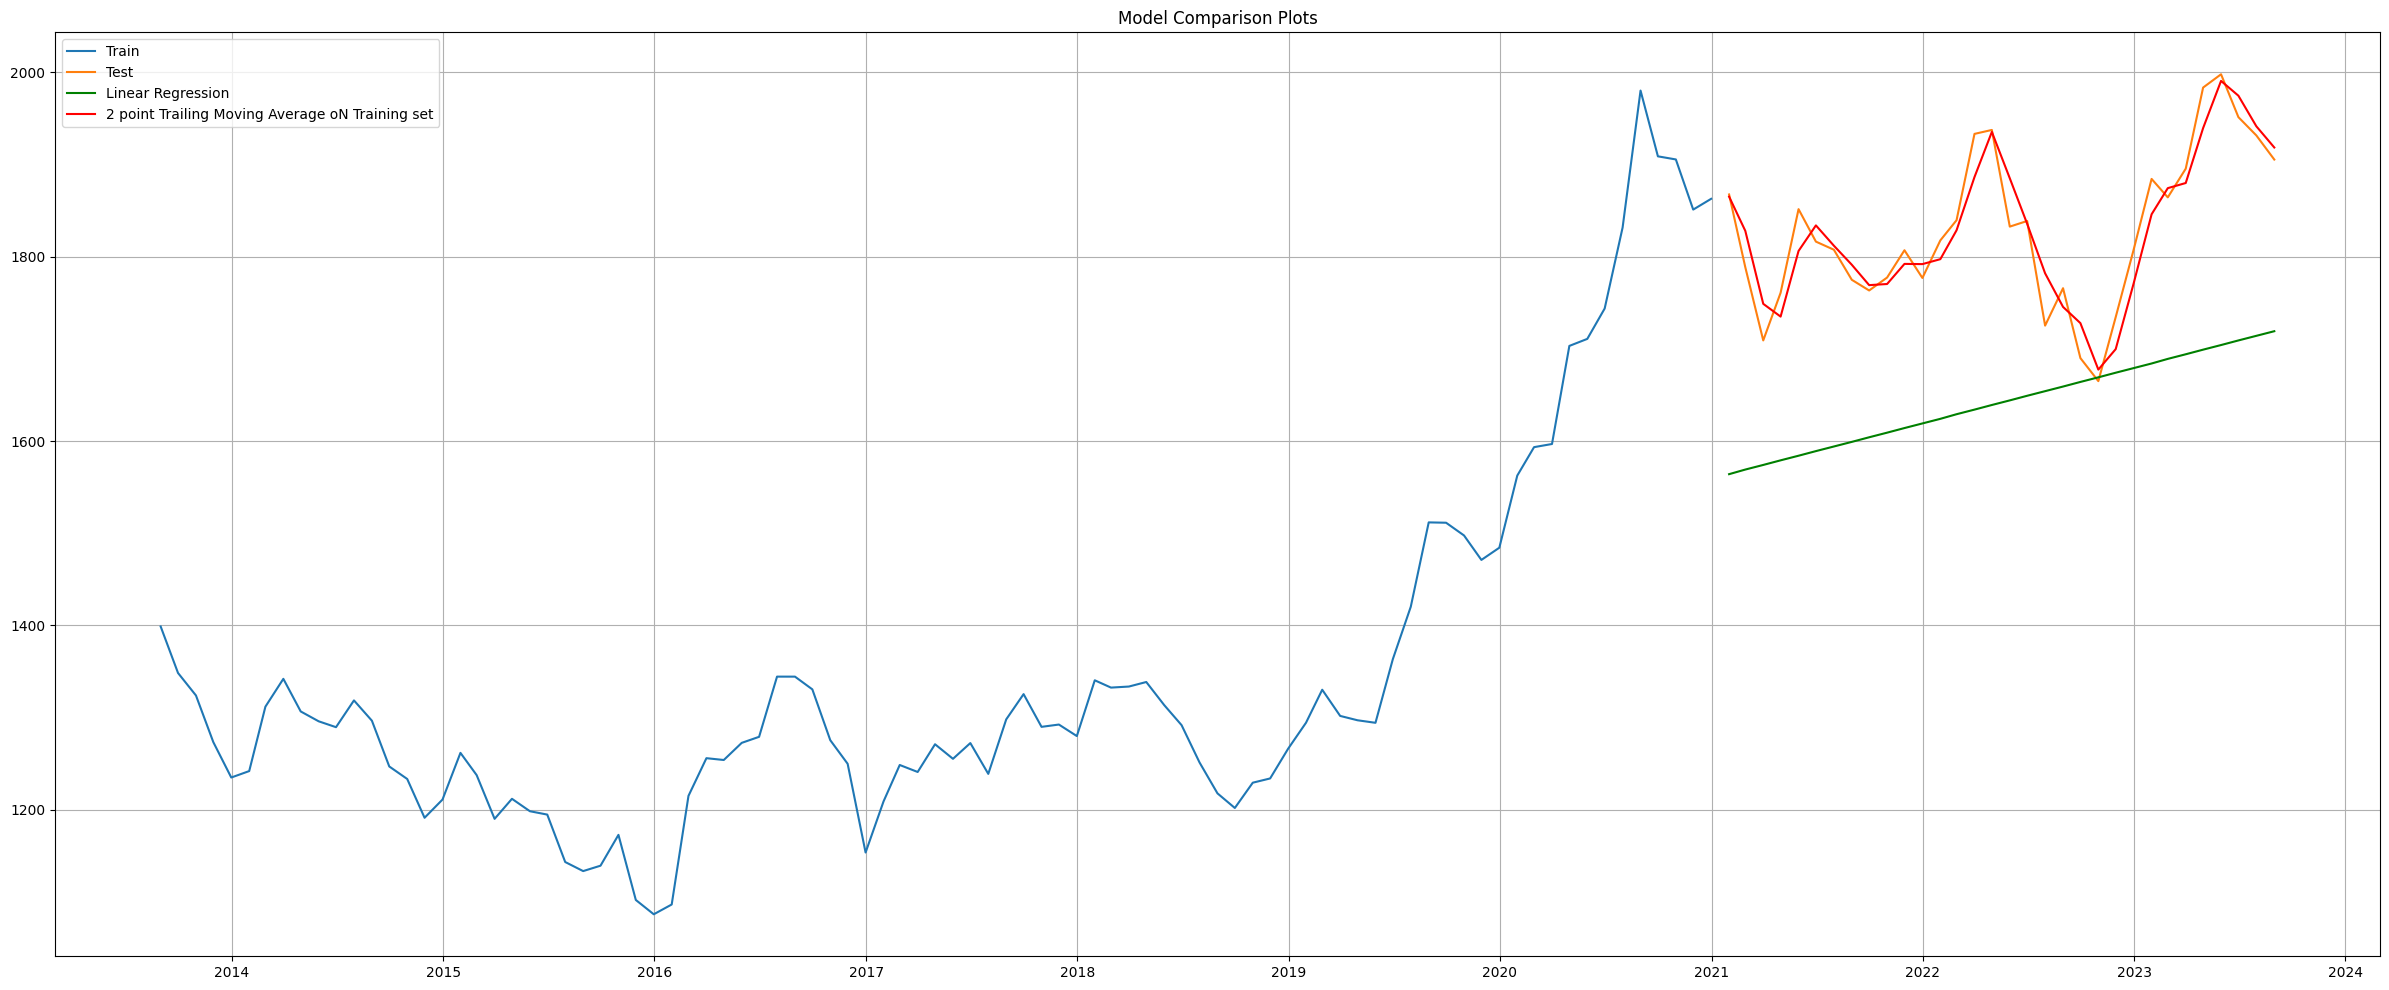

In [ ]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label= '2 point Trailing Moving Average oN Training set', color='red')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Simple Exponential Smoothening Models

In [ ]:
SES_train = train.copy()
SES_test = test.copy()

In [ ]:
model_SES = SimpleExpSmoothing (SES_train['Price']) #Define the simple exponential smoothening model

In [ ]:
model_SES_autofit = model_SES.fit(optimized=True)   #Fit the simple exponential smoothening model

In [ ]:
model_SES_autofit.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1398.9084349593495,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))   #Forecast the model
SES_test.head()

,Price,predict
Date,,
2021-01-31,1867.557895,1862.788334
2021-02-28,1788.609703,1862.788334
2021-03-31,1709.221059,1862.788334
2021-04-30,1760.909524,1862.788334
2021-05-31,1851.620000,1862.788334


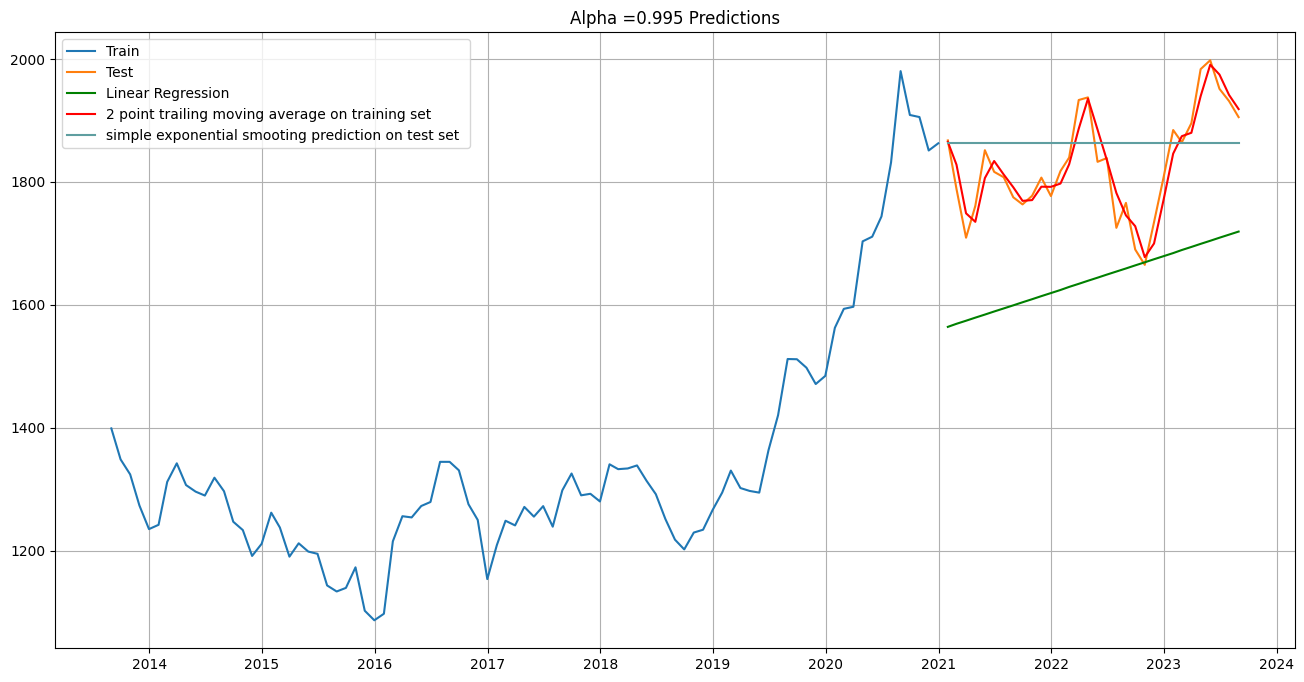

In [ ]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Price'], label='Train')
plt.plot(SES_test['Price'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 point trailing moving average on training set', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='simple exponential smooting prediction on test set ', color='cadetblue')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

Model Evaluation for  𝛼
  = 0.995 : Simple Exponential Smoothing

In [ ]:
## Test Data
#Complete the code to find the RMSE of simple exponential smoothening model
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Price'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 90.187


In [ ]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
Linear Regression,201.175903
2pointTrailingMovingAverage,27.871919
4pointTrailingMovingAverage,54.239048
6pointTrailingMovingAverage,69.512886
9pointTrailingMovingAverage,83.336308
"Alpha=0.995,SimpleExponentialSmoothing",90.186647


### Double Exponential Smoothening (Holt's Model)

Two parameters  𝛼
  and  𝛽
  are estimated in this model. Level and Trend are accounted for in this model.

In [ ]:
DES_train = train.copy()
DES_test = test.copy()

In [ ]:
model_DES = Holt(DES_train['Price']) #Define the double exponential smoothening model

In [ ]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [ ]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True) #fit the model
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=37)  #Forecast the model

        rmse_model6_train = metrics.mean_squared_error(DES_train['Price'],DES_train['predict',i,j],squared=False) #Find the RMSE on train data

        rmse_model6_test = metrics.mean_squared_error(DES_test['Price'],DES_test['predict',i,j],squared=False)    #Find teh RMSE on test data

        # Create a DataFrame from the current iteration's data
        current_result = pd.DataFrame({
            'Alpha Values': [i],  # Use a list to create a Series
            'Beta Values': [j],
            'Train RMSE': [rmse_model6_train],
            'Test RMSE': [rmse_model6_test]
        })
        # Append the current result to the main results DataFrame
        resultsDf_7 = pd.concat([resultsDf_7, current_result], ignore_index=True)

In [ ]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,65.404125,518.317157
1,0.3,0.4,65.661928,379.334293
2,0.3,0.5,65.909602,209.749679
3,0.3,0.6,66.092301,132.233361
4,0.3,0.7,66.153516,319.243160
...,...,...,...,...
59,1.0,0.6,49.130121,137.188471
60,1.0,0.7,50.454699,107.327452
61,1.0,0.8,51.956119,91.155144
62,1.0,0.9,53.702816,147.288225


In [ ]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
61,1.0,0.8,51.956119,91.155144
54,0.9,0.9,51.786497,94.424902
40,0.8,0.3,47.464513,98.549464
57,1.0,0.4,46.863742,99.605155
48,0.9,0.3,46.391811,103.510659


In [ ]:
resultsDf_7.sort_values(by=['Test RMSE']).tail()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
22,0.5,0.9,56.607992,882.280160
14,0.4,0.9,59.554939,925.425946
23,0.5,1.0,57.392313,934.104759
7,0.3,1.0,65.656905,938.638957
15,0.4,1.0,59.847367,1024.339951


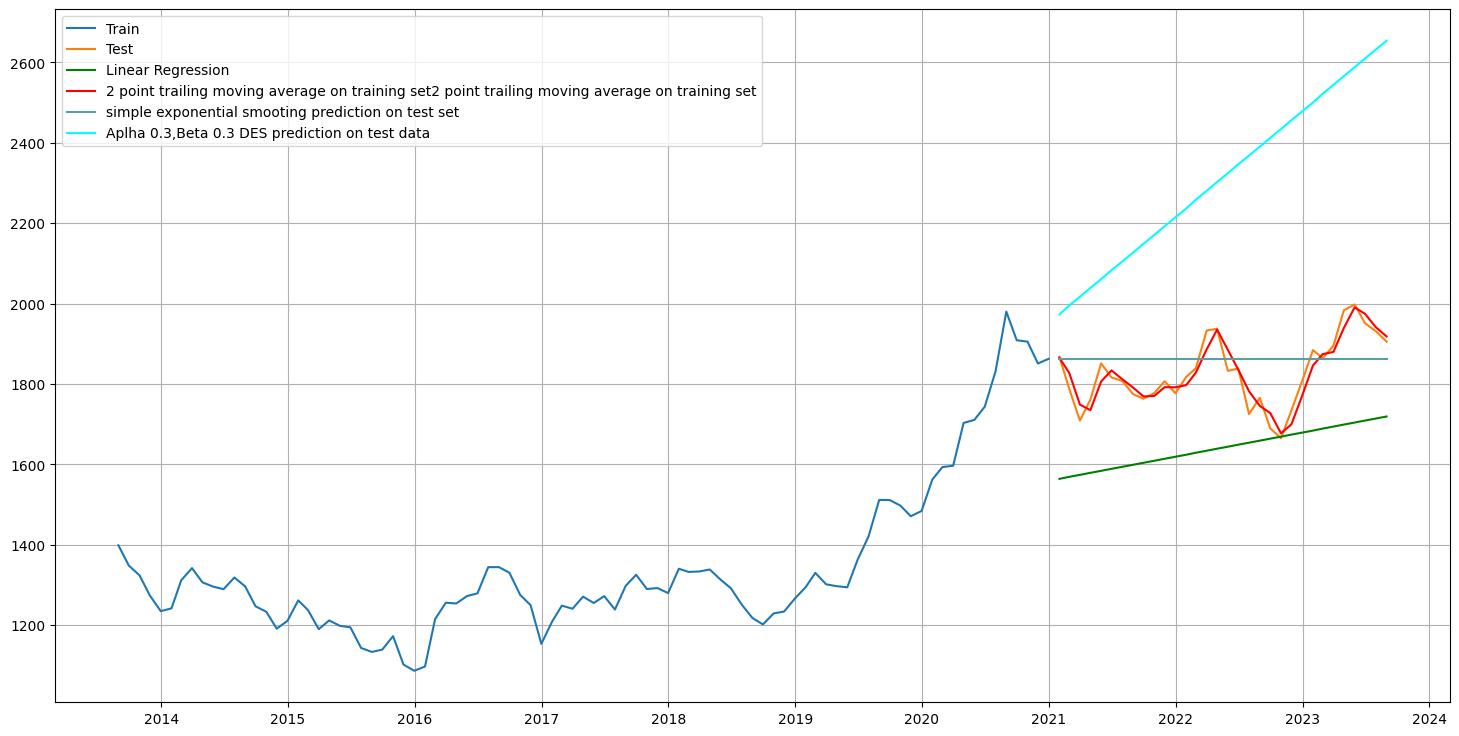

In [ ]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Price'], label='Train')
plt.plot(DES_test['Price'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label= '2 point trailing moving average on training set''2 point trailing moving average on training set', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='simple exponential smooting prediction on test set', color='cadetblue')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict',0.3,0.3], label='Aplha 0.3,Beta 0.3 DES prediction on test data ', color='cyan')


plt.legend(loc='best')
plt.grid();

In [ ]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.9,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
Linear Regression,201.175903
2pointTrailingMovingAverage,27.871919
4pointTrailingMovingAverage,54.239048
6pointTrailingMovingAverage,69.512886
9pointTrailingMovingAverage,83.336308
"Alpha=0.995,SimpleExponentialSmoothing",90.186647
"Alpha=0.9,Beta=0.3,DoubleExponentialSmoothing",91.155144


### Triple Exponential Smoothing (Holt - Winter's Model)

Three parameters  𝛼
 ,  𝛽
  and  𝛾
  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [ ]:
TES_train = train.copy()
TES_test = test.copy()

In [ ]:
model_TES = ExponentialSmoothing(TES_train['Price'],trend='additive',seasonal='multiplicative',freq ='M')  #Define the triple exponential smoothening model

In [ ]:
model_TES_autofit = model_TES.fit()   #Fit the triple exponential smoothening model

In [ ]:
model_TES_autofit.params

{'smoothing_level': 0.9949998490583635,
 'smoothing_trend': 0.07107261419360958,
 'smoothing_seasonal': 0.005000144436575897,
 'damping_trend': nan,
 'initial_level': 1306.4189376560842,
 'initial_trend': -5.7859125641139775,
 'initial_seasons': array([1.0797113 , 1.05503278, 1.04064066, 1.00973815, 0.99670093,
        1.02585177, 1.04802566, 1.04223551, 1.05212072, 1.04162283,
        1.04645144, 1.05597049]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))  #Forecast thetriple exponential smoothening model
TES_test.head()

,Price,auto_predict
Date,,
2021-01-31,1867.557895,1941.934526
2021-02-28,1788.609703,2009.449324
2021-03-31,1709.221059,2022.964189
2021-04-30,1760.909524,2067.162322
2021-05-31,1851.620000,2071.693806


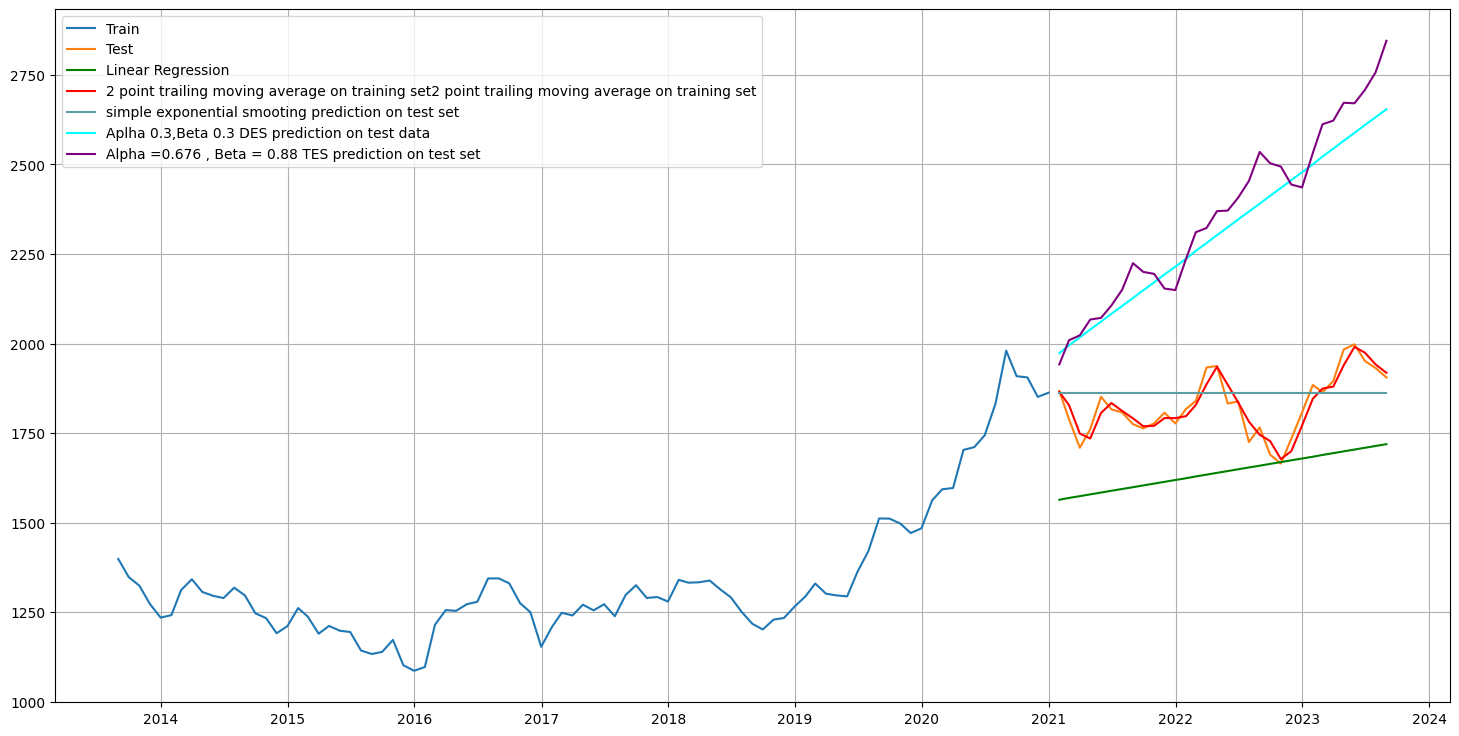

In [ ]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Price'], label='Train')
plt.plot(TES_test['Price'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label= '2 point trailing moving average on training set''2 point trailing moving average on training set', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='simple exponential smooting prediction on test set', color='cadetblue')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict',0.3,0.3], label='Aplha 0.3,Beta 0.3 DES prediction on test data ', color='cyan')

#Complete the code to plot the predictions based on the triple exponential smoothening model
plt.plot(TES_test['auto_predict'], label='Alpha =0.676 , Beta = 0.88 TES prediction on test set', color='purple')


plt.legend(loc='best')
plt.grid();

In [ ]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Price'],TES_test['auto_predict'],squared=False) #Find the RMSE on test data
print("For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 575.889


In [ ]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
Linear Regression,201.175903
2pointTrailingMovingAverage,27.871919
4pointTrailingMovingAverage,54.239048
6pointTrailingMovingAverage,69.512886
9pointTrailingMovingAverage,83.336308
"Alpha=0.995,SimpleExponentialSmoothing",90.186647
"Alpha=0.9,Beta=0.3,DoubleExponentialSmoothing",91.155144
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",575.888849


In [ ]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [ ]:
import pandas as pd
import numpy as np

# ... (your existing code) ...


# Instead of using append, create a list to store the results
results_list = []

for i in np.arange(0.3, 1.1, 0.1):
    for j in np.arange(0.3, 1.1, 0.1):
        for k in np.arange(0.3, 1.1, 0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i, smoothing_trend=j, smoothing_seasonal=k, optimized=False, use_brute=True)
            TES_train['predict', i, j, k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict', i, j, k] = model_TES_alpha_i_j_k.forecast(steps=37)

            rmse_model8_train = metrics.mean_squared_error(TES_train['Price'], TES_train['predict', i, j, k], squared=False)
            rmse_model8_test = metrics.mean_squared_error(TES_test['Price'], TES_test['predict', i, j, k], squared=False)

            # Append the results to the list
            results_list.append({'Alpha Values': i, 'Beta Values': j, 'Gamma Values': k,
                                  'Train RMSE': rmse_model8_train, 'Test RMSE': rmse_model8_test})

# Create a DataFrame from the list after the loop
resultsDf_8_2 = pd.DataFrame(results_list)

# ... (rest of your code) ...

In [ ]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
249,0.6,1.0,0.4,68.552426,98.077838
347,0.8,0.6,0.6,69.812451,107.108471
339,0.8,0.5,0.6,64.202801,110.251360
298,0.7,0.8,0.5,69.401087,113.552136
217,0.6,0.6,0.4,55.487984,122.001202


In [ ]:
list(TES_test.columns)

['Price',
 'auto_predict',
 ('predict', 0.3, 0.3, 0.3),
 ('predict', 0.3, 0.3, 0.4),
 ('predict', 0.3, 0.3, 0.5),
 ('predict', 0.3, 0.3, 0.6000000000000001),
 ('predict', 0.3, 0.3, 0.7000000000000002),
 ('predict', 0.3, 0.3, 0.8000000000000003),
 ('predict', 0.3, 0.3, 0.9000000000000001),
 ('predict', 0.3, 0.3, 1.0000000000000002),
 ('predict', 0.3, 0.4, 0.3),
 ('predict', 0.3, 0.4, 0.4),
 ('predict', 0.3, 0.4, 0.5),
 ('predict', 0.3, 0.4, 0.6000000000000001),
 ('predict', 0.3, 0.4, 0.7000000000000002),
 ('predict', 0.3, 0.4, 0.8000000000000003),
 ('predict', 0.3, 0.4, 0.9000000000000001),
 ('predict', 0.3, 0.4, 1.0000000000000002),
 ('predict', 0.3, 0.5, 0.3),
 ('predict', 0.3, 0.5, 0.4),
 ('predict', 0.3, 0.5, 0.5),
 ('predict', 0.3, 0.5, 0.6000000000000001),
 ('predict', 0.3, 0.5, 0.7000000000000002),
 ('predict', 0.3, 0.5, 0.8000000000000003),
 ('predict', 0.3, 0.5, 0.9000000000000001),
 ('predict', 0.3, 0.5, 1.0000000000000002),
 ('predict', 0.3, 0.6000000000000001, 0.3),
 ('predi

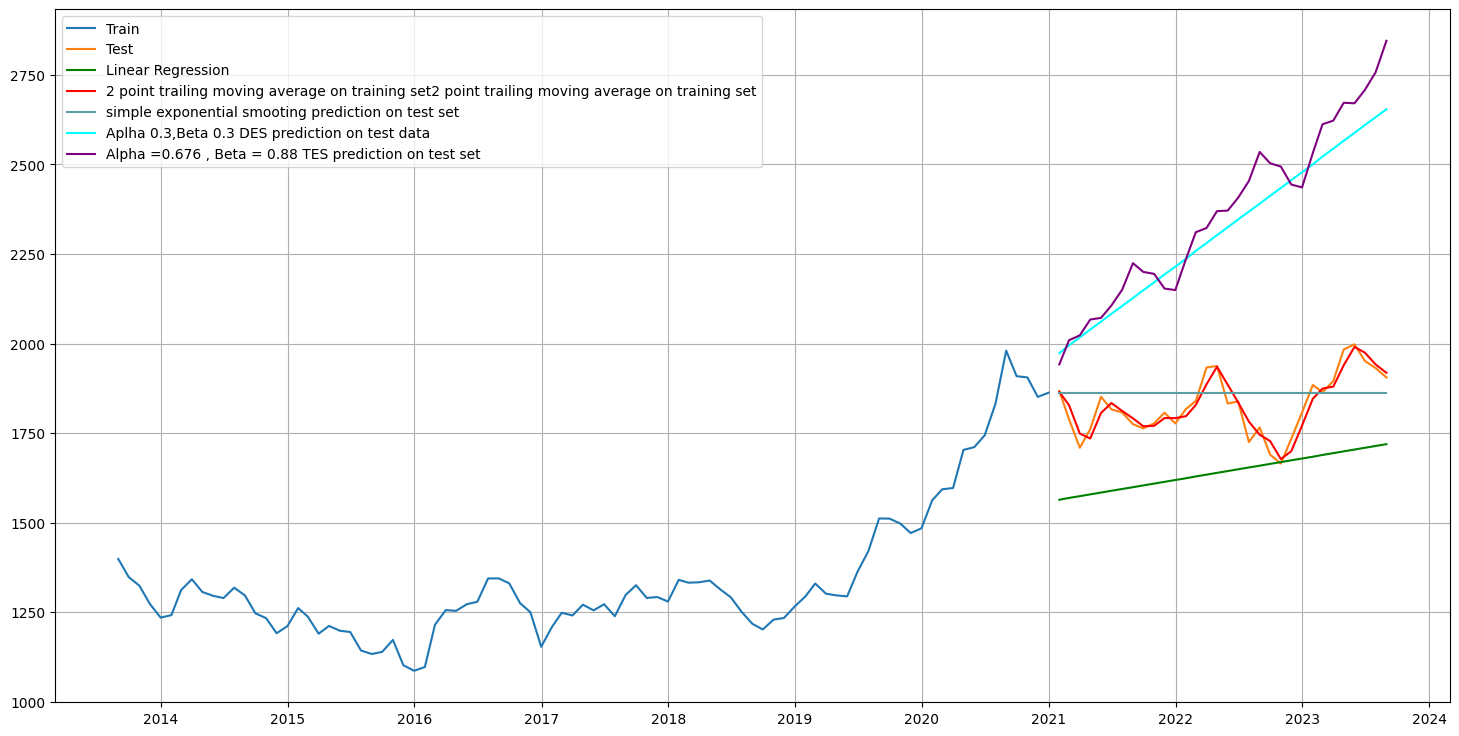

In [ ]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Price'], label='Train')
plt.plot(TES_test['Price'], label='Test')


# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label= '2 point trailing moving average on training set''2 point trailing moving average on training set', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='simple exponential smooting prediction on test set', color='cadetblue')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict',0.3,0.3], label='Aplha 0.3,Beta 0.3 DES prediction on test data ', color='cyan')

#Complete the code to plot the predictions based on the triple exponential smoothening model
plt.plot(TES_test['auto_predict'], label='Alpha =0.676 , Beta = 0.88 TES prediction on test set', color='purple')



plt.legend(loc='best')
plt.grid();

In [ ]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.8,Beta=0.5,Gamma=0.5,TripleExponentialSmoothing'])

results_Df = pd.concat([resultsDf, resultsDf_8_3])
results_Df

,Test RMSE
Linear Regression,201.175903
2pointTrailingMovingAverage,27.871919
4pointTrailingMovingAverage,54.239048
6pointTrailingMovingAverage,69.512886
9pointTrailingMovingAverage,83.336308
"Alpha=0.995,SimpleExponentialSmoothing",90.186647
"Alpha=0.9,Beta=0.3,DoubleExponentialSmoothing",91.155144
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",575.888849
"Alpha=0.8,Beta=0.5,Gamma=0.5,TripleExponentialSmoothing",98.077838


In [ ]:
print('Sorted by RMSE values on the Test Data:','\n',)
results_Df.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
2pointTrailingMovingAverage,27.871919
4pointTrailingMovingAverage,54.239048
6pointTrailingMovingAverage,69.512886
9pointTrailingMovingAverage,83.336308
"Alpha=0.995,SimpleExponentialSmoothing",90.186647
"Alpha=0.9,Beta=0.3,DoubleExponentialSmoothing",91.155144
"Alpha=0.8,Beta=0.5,Gamma=0.5,TripleExponentialSmoothing",98.077838
Linear Regression,201.175903
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",575.888849


# Check for stationarity of the whole Time Series data.

In [ ]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

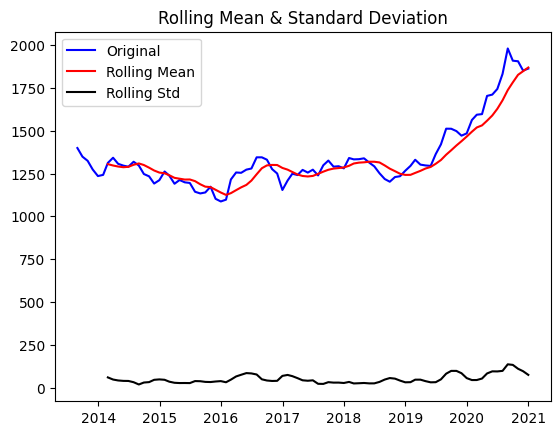

Results of Dickey-Fuller Test:
Test Statistic                  0.662224
p-value                         0.989053
#Lags Used                      0.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64 



In [ ]:
test_stationarity(train['Price'])     #Complete the code to test stationarity on the data

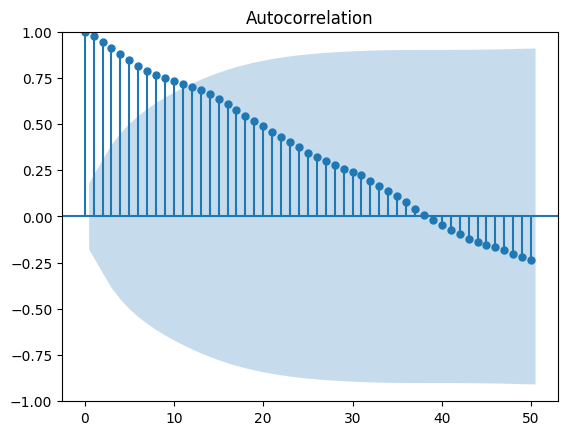

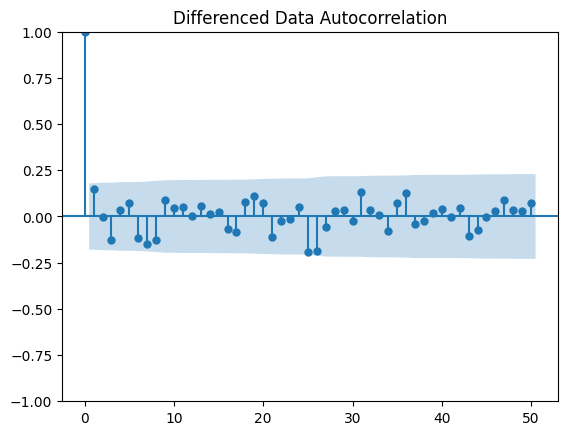

In [ ]:
plot_acf(df['Price'],lags=50)
plot_acf(df['Price'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

# Model Building - Stationary Data

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

### Auto ARIMA Model

In [ ]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1) #complete the code to ensure stationarity
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


In [ ]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [ ]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

for param in pdq:
    ARIMA_model = ARIMA(train['Price'],order=param).fit()  #Fit the ARIMA model
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))   #Complete the code to find the AIC values
    # Instead of append, use concat to add a new row
    ARIMA_AIC = pd.concat([ARIMA_AIC, pd.DataFrame([{'param':param, 'AIC': ARIMA_model.aic}])], ignore_index=True)

ARIMA(0, 0, 0) - AIC:1193.7374259325004
ARIMA(0, 0, 1) - AIC:1102.959679804568
ARIMA(0, 0, 2) - AIC:1034.0375805603248
ARIMA(1, 0, 0) - AIC:934.7439572415287
ARIMA(1, 0, 1) - AIC:933.5521487154359
ARIMA(1, 0, 2) - AIC:934.4648736643037
ARIMA(2, 0, 0) - AIC:933.1134887970003
ARIMA(2, 0, 1) - AIC:935.0886144943446
ARIMA(2, 0, 2) - AIC:934.8600529504746


In [ ]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC


In [ ]:
auto_ARIMA = ARIMA(train['Price'], order=(2,0,0),freq='M')  #Build the ARIMA model based on the best AIC values

results_auto_ARIMA = auto_ARIMA.fit()  #Fit the auto ARIMA model

print(results_auto_ARIMA.summary())   #Print the summary result

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   89
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -462.557
Date:                Sun, 08 Dec 2024   AIC                            933.113
Time:                        09:31:30   BIC                            943.068
Sample:                    08-31-2013   HQIC                           937.126
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1487.8215    282.652      5.264      0.000     933.833    2041.810
ar.L1          1.1841      0.101     11.726      0.000       0.986       1.382
ar.L2         -0.2025      0.111     -1.825      0.0

Predict on the Test Set using this model and evaluate the model.

In [ ]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))  #Forecast using the auto ARIMA
predicted_auto_ARIMA

,predicted_mean
2021-01-31,1858.313713
2021-02-28,1850.579277
2021-03-31,1842.338620
2021-04-30,1834.147078
2021-05-31,1826.116201
2021-06-30,1818.265619
2021-07-31,1810.595991
2021-08-31,1803.104120
2021-09-30,1795.786090
2021-10-31,1788.637907


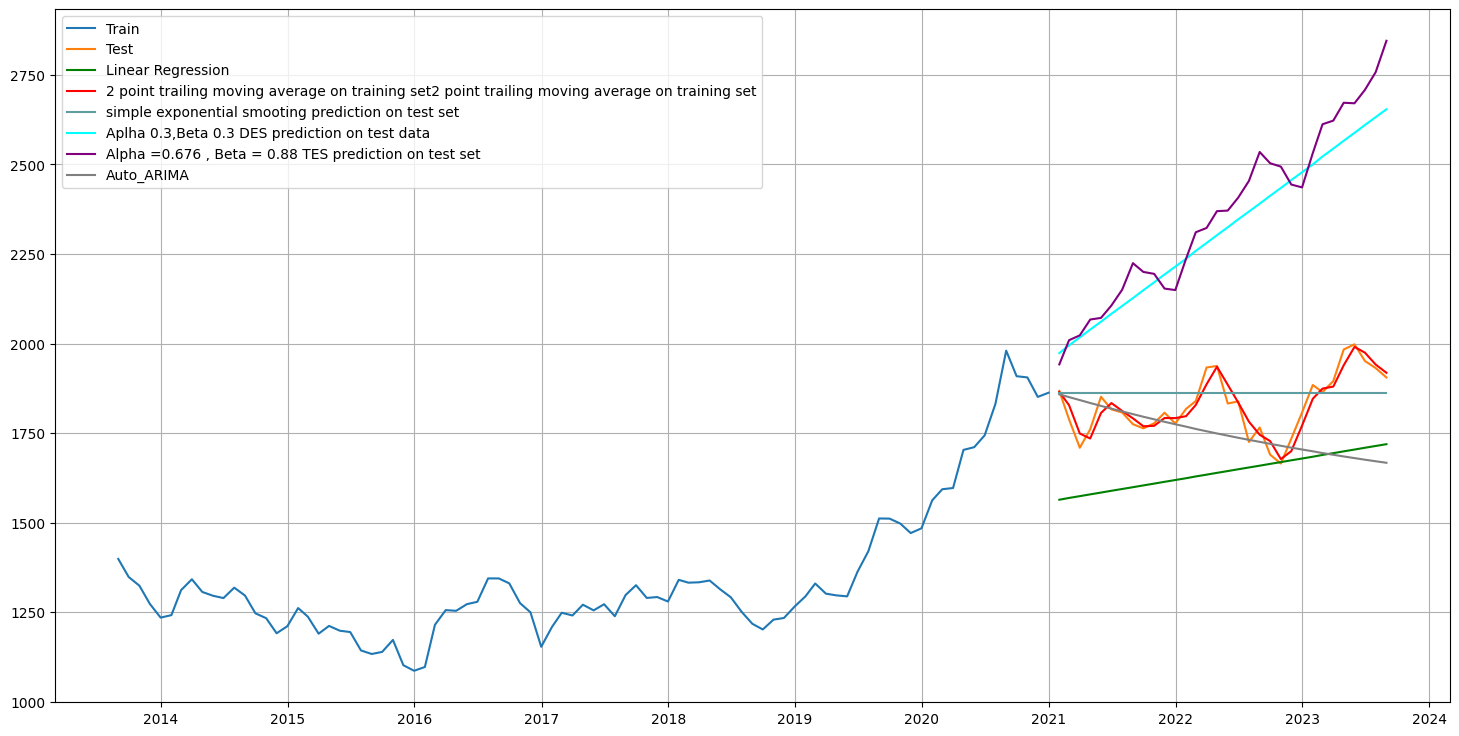

In [ ]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Price'], label='Train')
plt.plot(TES_test['Price'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label= '2 point trailing moving average on training set''2 point trailing moving average on training set', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='simple exponential smooting prediction on test set', color='cadetblue')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict',0.3,0.3], label='Aplha 0.3,Beta 0.3 DES prediction on test data ', color='cyan')

#Complete the code to plot the predictions based on the triple exponential smoothening model
plt.plot(TES_test['auto_predict'], label='Alpha =0.676 , Beta = 0.88 TES prediction on test set', color='purple')

#Complete the code to plot the predictions based on the Auto ARIMA model
plt.plot(predicted_auto_ARIMA, label='Auto_ARIMA', color='gray')

plt.legend(loc='best')
plt.grid();

In [ ]:
rmse = metrics.mean_squared_error(test['Price'],predicted_auto_ARIMA,squared=False)  #Find the RMSE on test data
print(rmse)

141.0422024151073


In [ ]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,0,0)'])

resultsDf

,RMSE
"ARIMA(2,0,0)",141.042202


### ARIMA Model

In [ ]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = range(0,3)  #Define the range of AR values based on the ACF & PACF plots
q = range(0,3)   #Define the range of AR values based on the ACF & PACF plots
d=  range(1,2)   #Define the value to make the data stationary
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

In [ ]:
!pip install pandas

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])  # Initialize an empty DataFrame

for param in pdq:
    ARIMA_model = ARIMA(train['Price'], order=param).fit()  # Fit the ARIMA model
    print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))
    # Use pd.concat to append the new row as a DataFrame
    ARIMA_AIC = pd.concat([ARIMA_AIC, pd.DataFrame([{'param': param, 'AIC': ARIMA_model.aic}])], ignore_index=True)

ARIMA(0, 0, 0) - AIC:1193.7374259325004
ARIMA(0, 0, 1) - AIC:1102.959679804568
ARIMA(0, 0, 2) - AIC:1034.0375805603248
ARIMA(1, 0, 0) - AIC:934.7439572415287
ARIMA(1, 0, 1) - AIC:933.5521487154359
ARIMA(1, 0, 2) - AIC:934.4648736643037
ARIMA(2, 0, 0) - AIC:933.1134887970003
ARIMA(2, 0, 1) - AIC:935.0886144943446
ARIMA(2, 0, 2) - AIC:934.8600529504746


In [ ]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
6,"(2, 0, 0)",933.113489
4,"(1, 0, 1)",933.552149
5,"(1, 0, 2)",934.464874
3,"(1, 0, 0)",934.743957
8,"(2, 0, 2)",934.860053
7,"(2, 0, 1)",935.088614
2,"(0, 0, 2)",1034.037581
1,"(0, 0, 1)",1102.959680
0,"(0, 0, 0)",1193.737426


In [ ]:
ARIMA_model1 = ARIMA(train['Price'], order=(1,1,0),freq='M')   #Build the ARIMA model based on the best params

results_ARIMA = ARIMA_model1.fit()  #Fit the ARIMA model

print(results_ARIMA.summary())  #Print the summary result

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   89
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -456.084
Date:                Sun, 08 Dec 2024   AIC                            916.168
Time:                        09:31:54   BIC                            921.122
Sample:                    08-31-2013   HQIC                           918.164
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1911      0.083      2.294      0.022       0.028       0.354
sigma2      1857.4559    242.134      7.671      0.000    1382.882    2332.030
Ljung-Box (L1) (Q):                   0.01   Jarque-

In [ ]:
predicted_ARIMA = results_ARIMA.forecast(steps=len(test))  #Forecast the ARIMA model
predicted_ARIMA

,predicted_mean
2021-01-31,1865.081152
2021-02-28,1865.508498
2021-03-31,1865.590184
2021-04-30,1865.605798
2021-05-31,1865.608782
2021-06-30,1865.609353
2021-07-31,1865.609462
2021-08-31,1865.609483
2021-09-30,1865.609487
2021-10-31,1865.609487


In [ ]:
rmse = metrics.mean_squared_error(test['Price'],predicted_ARIMA,squared=False)  #Find the RMSE on test data
print(rmse)

91.30061852774062


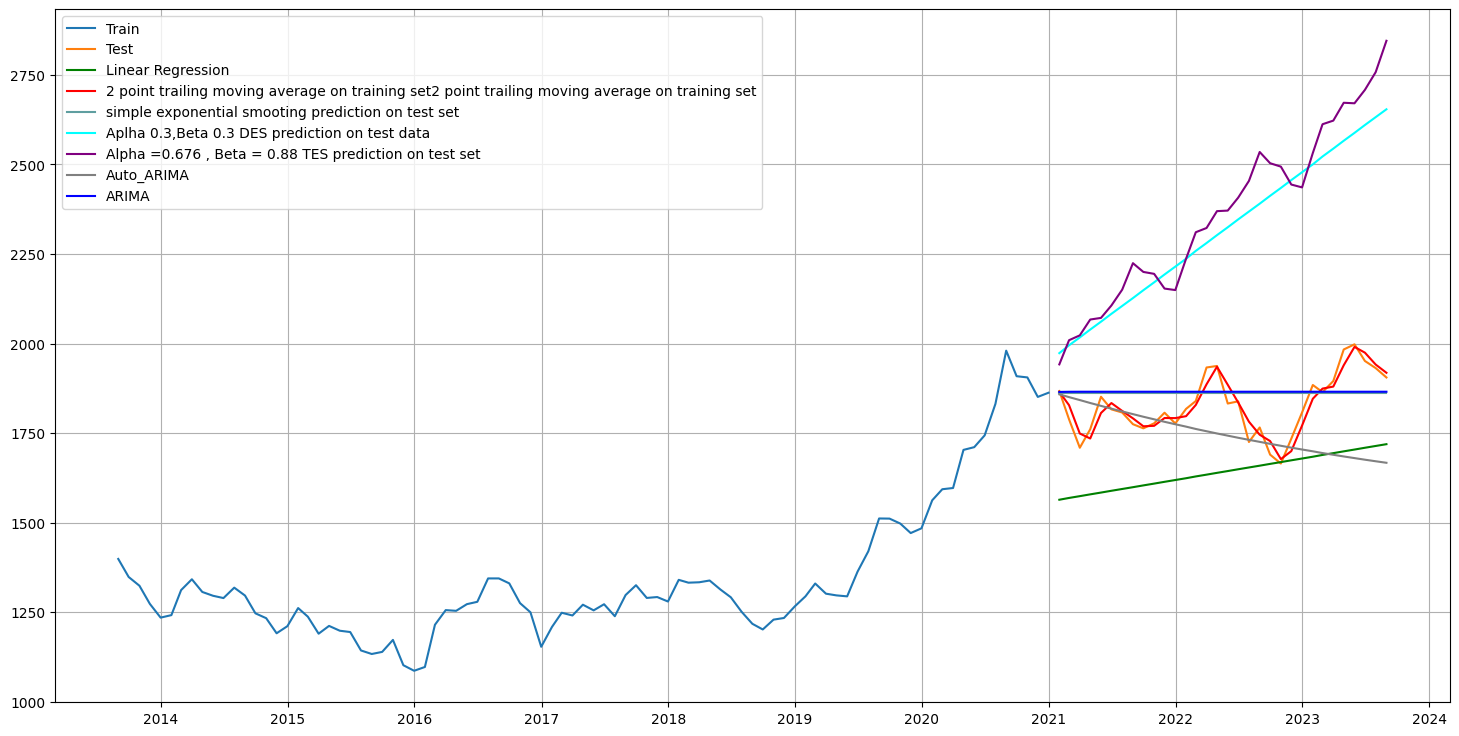

In [ ]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Price'], label='Train')
plt.plot(TES_test['Price'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label= '2 point trailing moving average on training set''2 point trailing moving average on training set', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='simple exponential smooting prediction on test set', color='cadetblue')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict',0.3,0.3], label='Aplha 0.3,Beta 0.3 DES prediction on test data ', color='cyan')

#Complete the code to plot the predictions based on the triple exponential smoothening model
plt.plot(TES_test['auto_predict'], label='Alpha =0.676 , Beta = 0.88 TES prediction on test set', color='purple')

plt.plot(predicted_auto_ARIMA, label='Auto_ARIMA', color='gray')

#Complete the code to plot the predictions based on the ARIMA model
plt.plot(predicted_ARIMA, label='ARIMA', color='blue')

plt.legend(loc='best')
plt.grid();

In [ ]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(1,1,0)'])

resultsDf

,RMSE
"ARIMA(1,1,0)",91.300619


In [ ]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(1,1,0)'])


resultsDf= pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(1,1,0)",91.300619
"ARIMA(1,1,0)",91.300619


In [ ]:
results_Df

,Test RMSE
Linear Regression,201.175903
2pointTrailingMovingAverage,27.871919
4pointTrailingMovingAverage,54.239048
6pointTrailingMovingAverage,69.512886
9pointTrailingMovingAverage,83.336308
"Alpha=0.995,SimpleExponentialSmoothing",90.186647
"Alpha=0.9,Beta=0.3,DoubleExponentialSmoothing",91.155144
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",575.888849
"Alpha=0.8,Beta=0.5,Gamma=0.5,TripleExponentialSmoothing",98.077838


### Compare the Performance of the model & Forecast

In [ ]:
results_Df.rename(columns={'Test RMSE':'RMSE'},inplace=True) # Remove the 'ascenting' parameter
result = pd.concat([results_Df, resultsDf])
result = result.sort_values(by='RMSE', ascending=True) # Add the 'ascending' parameter to sort_values
result

In [ ]:
# Assuming 'predicted_prices_2pointMA' contains the predictions from the best model
# and 'test' has the corresponding test dataset.

# Plot the original data and the best model's predictions
plt.plot(df['Price'], label='Original Data')  # Original data
plt.plot(test['Price'], label='Test Data')  # Test data
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2-Point Trailing Moving Average', linestyle='--')  # Best model
plt.legend()
plt.title('Price Comparison with Best Model (2-Point Trailing Moving Average)')  # Plot title
plt.xlabel('Date')  # X-axis label
plt.ylabel('Price')  # Y-axis label
plt.show()


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Build the TES model
model_TES = ExponentialSmoothing(df['Price'], trend='add', seasonal='add', seasonal_periods=12)  # Additive trend and seasonality

# Fit the TES model
model_TES_alpha_i_j_k = model_TES.fit(optimized=True)  # Automatically optimizes alpha, beta, and gamma

# Forecast for the next 12 months
predicted_results_final = model_TES_alpha_i_j_k.forecast(steps=12)  # Forecasting 12 steps ahead

# Plot the original and forecasted data
plt.plot(df['Price'], label='Original Data')
plt.plot(predicted_results_final, label='Forecasted Data')
plt.legend(loc='best')
plt.title('Gold Price Existing and Forecasted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
